In [4]:
%matplotlib inline
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.pop(1)
sys.path.insert(0,'/tigress/changgoo/pyathena-TIGRESS')

# Vertical External Gravity

* Local gravity: a modified KG89 Model - gas gravity + DM halo with flat roation
    $$ -g(z)=2\pi G \left[\frac{\Sigma_*}{\sqrt{z^2+z_*^2}}\right]z+4\pi G\rho_{\rm dm}\frac{z}{1+z^2/R_0^2} $$

    $$ \Phi = 2\pi G \Sigma_*(\sqrt{z^2+z_*^2}-z_*) + 2\pi G \rho_{\rm dm}R_0^2\ln\left(1+\frac{z^2}{R_0^2}\right)$$

* Solar neighborhood parameter http://adsabs.harvard.edu/abs/2013ApJ...772..108Z
    * $\Sigma_{*,\odot}=42 M_{\odot} {\rm pc}^{-2}$ and $z_{*,\odot}=0.245{\rm \,kpc}$
    * $\rho_{\rm dm,\odot} =0.0064 M_{\odot} {\rm pc}^{-3}$
    * $R_\odot=8{\rm \, kpc}$
    * $\Sigma_{\rm gas,\odot}=13 M_{\odot} {\rm pc}^{-2}$
    * $\Omega_\odot=28{\rm km/s/kpc}$

* Global galaxy model:
    * stellar surface density
    $$ \Sigma_{\rm *}(R) = \Sigma_{\rm *,0}\exp (-R/R_{\rm *})$$
        * $R_*=2.5 {\rm kpc}$ http://adsabs.harvard.edu/abs/2008ApJ...673..864J
        * $\Sigma_{*,0}$ is set to have $\Sigma_*(R_\odot)=\Sigma_{*,\odot}$ at $R_\odot=8{\rm kpc}$
    $$ M_{\rm *}(R) = 2\pi \Sigma_{\rm *,0}R_*^2\left[1-\exp(-R/R_*)(1+R/R_*)\right]$$
    $$ V_c^2(R)=4\pi G \Sigma_{\rm *,0}R_* y^2[I_0(y)K_0(y)-I_1(y)K_1(y)]$$
        * $y\equiv R/R_*$
    * gas surface density
    $$ \Sigma_{\rm gas}(R) = \Sigma_{g1}\exp(-R/R_{g1}) + \Sigma_{g2}\exp(-R/R_{g2})$$
        * $R_{g1}=2 {\rm kpc}$, $R_{g2}=6 {\rm kpc}$, and $\Sigma_{g1}/\Sigma_{g2}=8$ (these are arbitrary choice)
        * $\Sigma_{g1}$ is set to have $\Sigma_{\rm gas}(R_\odot)=\Sigma_{\rm gas,\odot}$
    * midplane dark matter volume density: NFW profile
    $$ \rho_{\rm dm}(r) = \frac{\rho_{\rm dm,0}}{x(1+x)^2}$$
        * $x\equiv r/r_{\rm NFW}$
        * $r_{\rm NFW}=8 {\rm kpc}$ and $\rho_{\rm dm,0}$ are set to satisfy $\rho_{\rm dm}(R_\odot)=\rho_{\rm dm,\odot}$
    $$ M_{\rm dm}(r) = 4\pi\rho_{\rm dm,0}r_{\rm NFW}^3\left[\ln(1+x)-\frac{x}{1+x}\right]$$
    $$ \Phi_{\rm dm}(r) = \frac{4\pi G \rho_{\rm dm,0}r_{\rm NFW}^3}{r} \ln (1+x) $$
    $$ F_z = - \frac{d\Phi}{dz} = -\frac{4\pi G \rho_{\rm dm,0}r_{\rm NFW}^3}{r^2}\left(\ln(1+x)-\frac{x}{1+x}\right)\frac{z}{r} $$
        * $r=\sqrt{R^2+z^2}$
    * bulge: Hernquist profile
    $$ \rho_{\rm bulge}(r) = \frac{M_b}{2\pi a^3}\frac{1}{s(s+1)^3}$$
        * $s\equiv r/a$
        * $a=0.6{\rm kpc}$ and $M_b=5\times10^9M_\odot$
    $$ M_{\rm bulge}(r) = M_b\frac{s^2}{(s^2+1)}$$
    $$ \Sigma_{\rm bulge}(R) = \frac{M_b}{2\pi a^2} \frac{(2+s^2)X(s)-3}{(1-s^2)^2} $$
        * $X(s)=\sec^{-1}(s)/\sqrt{s^2-1}$ for $s>1$
    $$ \Phi_{\rm bulge}(r) = -\frac{GM_b}{r+a} $$
    $$ F_z = - \frac{d\Phi}{dz} = - \frac{ G M_b}{(r+a)^2}\frac{z}{r} $$
    

In [5]:
params={}
params['radius']=np.array([2,4,8,16])

In [6]:
Sigma_star_sun=42*c.M_sun/c.pc**2
R_sun=8*c.kpc
R_star=2.5*c.kpc
Sigma_star0=Sigma_star_sun*np.exp(R_sun/R_star)

print Sigma_star0.to('Msun/pc^2')

1030.36626828 solMass / pc2


In [7]:
Sigma_gas_sun=10*c.M_sun/c.pc**2
R_gas1=2*c.kpc
R_gas2=5*c.kpc
ratio12=8
Sigma_gas2=Sigma_gas_sun/(ratio12*np.exp(-R_sun/R_gas1)+np.exp(-R_sun/R_gas2))
Sigma_gas1=Sigma_gas2*ratio12
print Sigma_gas2.to('Msun/pc^2'),Sigma_gas1.to('Msun/pc^2')

28.700858858 solMass / pc2 229.606870864 solMass / pc2


9.9455e+29 kg


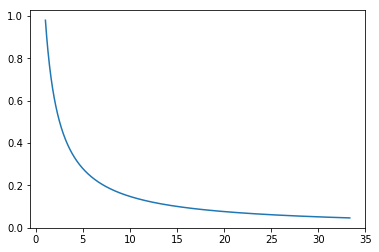

In [8]:
R=np.linspace(0.1,20,1000)*c.kpc
Sigma_star=Sigma_star0*np.exp(-R/R_star)
Sigma_gas=Sigma_gas1*np.exp(-R/R_gas1)+Sigma_gas2*np.exp(-R/R_gas2)

a=0.6*c.kpc
Mb0=5e9*c.M_sun#((220*u.km/u.s)**2*0.05*(R_sun+a)**2/R_sun/c.G).to('Msun')
print Mb0/1.e10

Mb=Mb0*R**2/(R+a)**2
rho_bulge=Mb0/(2*np.pi)*a/R/(R+a)**3
s=(R/a).cgs.value
idx=s>1.
s=s[idx]
Xs=np.arccos(1/s)/np.sqrt(s**2-1)
plt.plot(s,Xs)
Sigma_bulge=Mb0/(2*np.pi*a**2*(1-s**2)**2)*((2+s**2)*Xs-3)

[ 462.97687505  208.02848211   42.00032316    1.71202112]
[ 103.70743261   43.970317     10.00006171    1.24693685]
[ 48.0146183    8.20709967   1.218367     0.16671679]


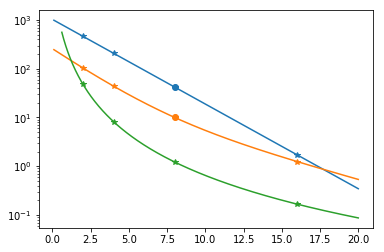

In [9]:
l1,=plt.semilogy(R.to('kpc'),Sigma_star.to('Msun/pc^2'))
l2,=plt.plot(R.to('kpc'),Sigma_gas.to('Msun/pc^2'))
l3,=plt.plot(s*a.to('kpc'),Sigma_bulge.to('Msun/pc^2'))
plt.scatter(R_sun.to('kpc'),Sigma_star_sun.to('Msun/pc^2'),marker='o')
plt.scatter(R_sun.to('kpc'),Sigma_gas_sun.to('Msun/pc^2'),marker='o')
params['surf_star']=np.interp(params['radius'],R.to('kpc'),Sigma_star.to('Msun/pc^2'))
params['surf_gas']=np.interp(params['radius'],R.to('kpc'),Sigma_gas.to('Msun/pc^2'))
params['surf_bulge']=np.interp(params['radius'],s*a.to('kpc'),Sigma_bulge.to('Msun/pc^2'))
plt.plot(params['radius'],params['surf_star'],'*',color=l1.get_color())
plt.plot(params['radius'],params['surf_gas'],'*',color=l2.get_color())
plt.plot(params['radius'],params['surf_bulge'],'*',color=l3.get_color())
print params['surf_star']
print params['surf_gas']
print params['surf_bulge']


2.56 solMass / kpc3


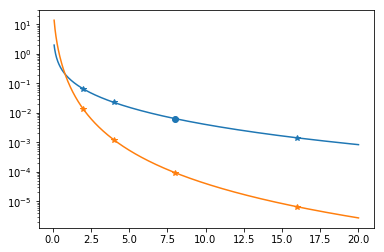

In [10]:
rho_dm_sun=0.0064*c.M_sun/c.pc**3
R_nfw=8*c.kpc
rho0=rho_dm_sun*(R_sun/R_nfw*(1+R_sun/R_nfw)**2)
rho_dm=rho0/((R/R_nfw)*(1+R/R_nfw)**2)
print rho0.to('Msun/kpc^3')/1.e7
l1,=plt.semilogy(R.to('kpc'),rho_dm.to('Msun/pc^3'))
l2,=plt.plot(R.to('kpc'),rho_bulge.to('Msun/pc^3'))
plt.scatter(8,0.0064)
params['rho_dm']=np.interp(params['radius'],R.to('kpc'),rho_dm.to('Msun/pc^3'))
params['rho_bulge']=np.interp(params['radius'],R.to('kpc'),rho_bulge.to('Msun/pc^3'))
plt.plot(params['radius'],params['rho_dm'],'*',color=l1.get_color())
plt.plot(params['radius'],params['rho_bulge'],'*',color=l2.get_color())

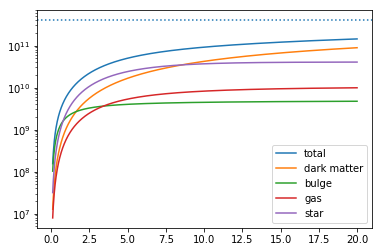

In [11]:
Mnfw=4*np.pi*rho0*R_nfw**3*(np.log(1+R/R_nfw)-R/(R_nfw+R))
Mgas1=2*np.pi*Sigma_gas1*R_gas1**2*(1-np.exp(-R/R_gas1)*(R/R_gas1+1))
Mgas2=2*np.pi*Sigma_gas2*R_gas2**2*(1-np.exp(-R/R_gas2)*(R/R_gas2+1))
Mstar=2*np.pi*Sigma_star0*R_star**2*(1-np.exp(-R/R_star)*(R/R_star+1))
Mgas=Mgas1+Mgas2
Mtot=Mnfw+Mgas+Mstar+Mb
plt.plot(R.to('kpc'),Mtot.to('Msun'),label='total')
plt.plot(R.to('kpc'),Mnfw.to('Msun'),label='dark matter')
plt.plot(R.to('kpc'),Mb.to('Msun'),label='bulge')
plt.plot(R.to('kpc'),Mgas.to('Msun'),label='gas')
plt.plot(R.to('kpc'),Mstar.to('Msun'),label='star')
plt.axhline(4.e11,ls=':')
plt.yscale('log')
plt.legend()

220.781095984


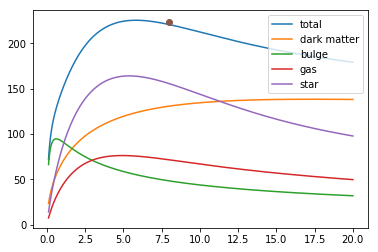

In [15]:
import scipy.special as sp
Vnfw=np.sqrt(c.G*Mnfw/R)
y1=(R/2.0/R_gas1).cgs.value
y2=(R/2.0/R_gas2).cgs.value
Vgas1=np.sqrt(4*np.pi*c.G*Sigma_gas1*R_gas1*y1**2*(sp.iv(0,y1)*sp.kn(0,y1)-sp.iv(1,y1)*sp.kn(1,y1)))
Vgas2=np.sqrt(4*np.pi*c.G*Sigma_gas2*R_gas2*y2**2*(sp.iv(0,y2)*sp.kn(0,y2)-sp.iv(1,y2)*sp.kn(1,y2)))
Vgas=np.sqrt(Vgas1**2+Vgas2**2)
ystar=(R/2.0/R_star).cgs.value
Vstar=np.sqrt(4*np.pi*c.G*Sigma_star0*R_star*ystar**2*(sp.iv(0,ystar)*sp.kn(0,ystar)-sp.iv(1,ystar)*sp.kn(1,ystar)))
Vbulge=np.sqrt(c.G*Mb/R)
Vc=np.sqrt(Vnfw**2+Vgas1**2+Vgas2**2+Vstar**2+Vbulge**2)
plt.plot(R.to('kpc'),Vc.to('km/s'),label='total')
plt.plot(R.to('kpc'),Vnfw.to('km/s'),label='dark matter')
plt.plot(R.to('kpc'),Vbulge.to('km/s'),label='bulge')
plt.plot(R.to('kpc'),Vgas.to('km/s'),label='gas')
plt.plot(R.to('kpc'),Vstar.to('km/s'),label='star')
plt.plot(8,28*8,'o')
plt.legend()
print np.interp(8.,R.to('kpc'),Vc.to('km/s'))

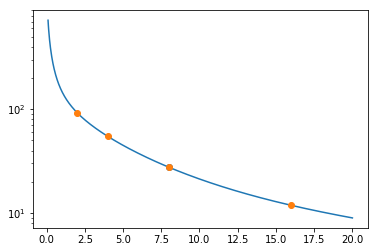

In [16]:
Omega=(Vc/R).to('km/s/kpc')
plt.semilogy(R.to('kpc'),Omega.to('km/s/kpc'))
params['Omega']=np.interp(params['radius'],R.to('kpc'),Omega.to('km/s/kpc'))
plt.plot(params['radius'],params['Omega'],'o')
plt.scatter(8,28)

[ 0.69357741  0.8513139   1.13186149  1.25722438]


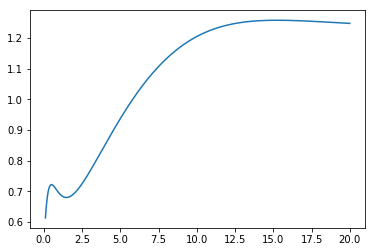

In [17]:
Rmid=0.5*(R[1:]+R[:-1])
Omid=0.5*(Omega[1:]+Omega[:-1])
q=-Rmid/Omid*Omega.diff()/R.diff()
plt.plot(Rmid.to('kpc'),q)
print np.interp(params['radius'],Rmid.to('kpc'),q)

11.7929798125 km / s


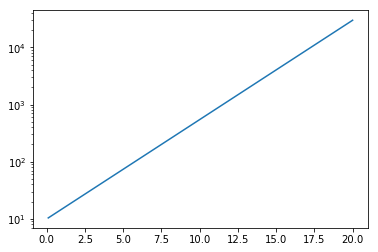

In [18]:
Hstar_sun=245*c.pc
sigma_star_sun = np.sqrt(Hstar_sun*np.pi*c.G*Sigma_star_sun)
print sigma_star_sun.to('km/s')
plt.semilogy(R.to('kpc'),Hstar_sun.to('pc')*Sigma_star_sun/Sigma_star)
params['H_star']=np.interp(params['radius'],R.to('kpc'),Hstar_sun.to('kpc')*Sigma_star_sun/Sigma_star)
# constant scale height
params['H_star']=0.245

# FUV Normalization

$$ 4\pi J_{\rm FUV} = \Sigma_{\rm FUV} \frac{1-E_2(\tau_\perp/2)}{\tau_\perp}$$
$$ \frac{\Gamma}{\Gamma_0}=\frac{J_{\rm FUV}}{J_{\rm FUV,0}}=\frac{\Sigma_{\rm FUV} f(\tau_\perp)}{\Sigma_{\rm FUV,0} f(\tau_{\perp,0})}=\frac{\Sigma_{\rm FUV}}{\Sigma_{\rm FUV,0}'}$$,
where 
$$\Sigma_{\rm FUV,0}'\equiv \frac{ \Sigma_{\rm FUV,0} f(\tau_{\perp,0})}{f(\tau_\perp)}= \frac{4 \pi J_{\rm FUV,0}}{f(\tau_\perp)}$$
* $\tau_\perp=\kappa_d \Sigma$
    * Can we use total surface density? or Should we use $\Sigma$ within $|z|<H_{\rm OB}$?

6.84422621492 solLum / pc2
0.208908219167 pc2 / solMass
[ 21.66533506   9.18576062   2.08909508   0.26049536]
[ 0.04615661  0.10869036  0.41210333  1.262421  ]
[ 148.28268481   62.9699471    16.60803444    5.42150854] solLum / pc2
[ 61.10778746  25.95012458   6.84422621   2.2342217 ] solLum / pc2


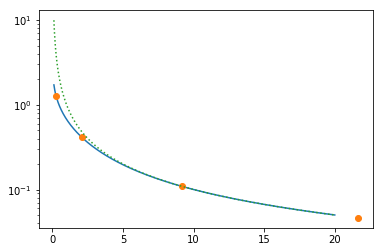

In [19]:
def fslab(tau):
    from scipy.special import expn
    return (1-expn(2,tau/2))/tau

JFUV0=2.2e-4*u.erg/u.cm**2/u.s
print 4*np.pi*JFUV0.to('Lsun/pc^2')
Sigma_FUV0=4*np.pi*JFUV0.to('Lsun/pc^2')
kappad=1.e3*u.cm**2/u.g
print kappad.to('pc^2/Msun')
tauperp=(kappad*params['surf_gas']*c.M_sun/c.pc**2).cgs.value
tau=np.linspace(0.1,20,1000)

f=fslab(tauperp)
print tauperp
print f
print Sigma_FUV0/f
print Sigma_FUV0*f[2]/f
params['surf_fuv0']=Sigma_FUV0*f[2]/f
plt.plot(tau,fslab(tau))
plt.plot(tauperp,f,'o')
plt.plot(tau,1/tau,ls=':')
plt.yscale('log')

In [20]:
torb=2*np.pi/(params['Omega']*u.km/u.s/u.kpc)
params['torb']= torb.to('Myr').value
rho_star=params['surf_star']*c.M_sun/c.pc**2/(params['H_star']*c.kpc)/2.0
#rho_gas=params['surf_star']*c.M_sun/c.pc**2/(params['H_star']*c.kpc)/2.0
params['rho_star']=rho_star.to('M_sun/pc**3').value
tver=np.sqrt(np.pi)/np.sqrt(4*c.G*(params['rho_star']+params['rho_dm'])*c.M_sun/c.pc**3)
params['tver']=tver.to('Myr').value
print tver.to('Myr')/40

[ 0.32858389  0.49384353  1.088242    4.71062239] Myr


In [21]:
import pandas as pd
label=[]
for r in params['radius']:
    label.append('R%d' % r)
model=pd.DataFrame(params,index=label)

In [24]:
model

,H_star,Omega,radius,rho_bulge,rho_dm,rho_star,surf_bulge,surf_fuv0,surf_gas,surf_star,torb,tver
R2,0.245,92.630918,2,0.013585,0.065538,0.944851,48.014618,61.107787,103.707433,462.976875,66.323965,13.143356
R4,0.245,54.800325,4,0.001226,0.022756,0.424548,8.207100,25.950125,43.970317,208.028482,112.109731,19.753741
R8,0.245,27.597684,8,0.000094,0.006400,0.085715,1.218367,6.844226,10.000062,42.000323,222.614685,43.529680
R16,0.245,11.852787,16,0.000007,0.001422,0.003494,0.166717,2.234222,1.246937,1.712021,518.329526,188.424896


In [25]:
# new model
class initial(object):
    def __init__(self,param={}):
        self.surf_s=param['surf_star']*c.M_sun/c.pc**2
        self.rho_dm=param['rho_dm']*c.M_sun/c.pc**3
        self.z0=param['H_star']*c.kpc
        self.R0=param['radius']*c.kpc
        self.surf_g=param['surf_gas']*c.M_sun/c.pc**2*1.3
        self.sig1=10*u.km/u.s
        self.sig2=10*self.sig1
        
    def gext(self,z):

        a1=2*np.pi*c.G*self.surf_s
        a2=4*np.pi*c.G*self.rho_dm
        g1=-a1*z/np.sqrt(z**2+self.z0**2)
        g2=-a2*z/(z**2/self.R0**2+1)
        g_new=g1+g2
    
        return g_new

    def phiext(self,z):
        phi=2*np.pi*c.G*(self.surf_s*(np.sqrt(z**2+self.z0**2)-self.z0)
                         +self.rho_dm*self.R0**2*np.log(1+z**2/self.R0**2))
        return phi
    
    def vesc(self,z):
        return np.sqrt(2*(self.phiext(z).to('km^2/s^2')))
    
    def phisg(self,z,zg):
        phi=2*np.pi*c.G*self.surf_g*np.abs(z)#(np.sqrt(z**2+zg**2)-zg)
        
        #phi=np.log(np.cosh((z/zg).cgs.value))*2*np.pi*c.G*self.surf_g*zg
        return phi
    def gsg(self,z,zg):
        gsg=-2*np.pi*c.G*self.surf_g#*np.tanh((z/zg).cgs.value)
        return gsg
    def set_n0(self,z):
    
        n0=1.0/u.cm**3
        
        for i in range(10):
            H=self.surf_g/2.0/(1.4271*c.m_p*n0)
            phitot=self.phiext(z)+self.phisg(z,H.to('pc'))
            phitot=phitot.to('km^2/s^2')

            rho10=n0*1.4271*c.m_p
            rho20=0.00001*rho10
            rho1=rho10*np.exp(-(phitot-phitot.min())/self.sig1**2)
            rho2=rho20*np.exp(-(phitot-phitot.min())/self.sig2**2)
            rho=rho1+rho2
            nden=rho/1.4271/c.m_p
            
            n0=n0*(self.surf_g/(2.0*(rho.sum()*z[1]).to('Msun/pc^2'))).cgs
            #print n0,H.to('pc')
            #print n0,2.0*(rho1.sum()*z[1]).to('Msun/pc^2'),2.0*(rho.sum()*z[1]).to('Msun/pc^2')
        self.n0=n0
        self.H=H.to('pc')
        
    def den(self,z):
        phitot=self.phiext(z)+self.phisg(z,self.H)
        phitot=phitot.to('km^2/s^2')
        rho10=self.n0*1.4271*c.m_p
        rho20=0.00001*rho10
        rho1=rho10*np.exp(-(phitot-phitot.min())/self.sig1**2)
        rho2=rho20*np.exp(-(phitot-phitot.min())/self.sig2**2)
        rho=rho1+rho2
        nden=rho/1.4271/c.m_p

        return nden,rho1,rho2
    
    def press(self,z):
        n,rho1,rho2=self.den(z)
        P1=rho1*self.sig1**2
        P2=rho2*self.sig2**2
        pok=(P1+P2).cgs/c.k_B.cgs
        
        return pok,P1,P2
    
    def pmag(self,z,beta=10):
        pok,P1,P2=self.press(z)
        Pmag=(P1+P2)/beta

        return Pmag
    
    def Bmag(self,z,beta=10):
        Pmag=self.pmag(z,beta=beta)
        return np.sqrt(Pmag.cgs*8*np.pi)
    
def draw_figure(param,z,beta=10):
    model=initial(param)
    model.set_n0(z)
    nden,rho1,rho2=model.den(z)
    n1=rho1/1.4271/c.m_p
    n2=rho2/1.4271/c.m_p
    
    
    plt.figure(figsize=(8,6))
    plt.subplot(221)
    
    plt.plot(z,n1,label='warm')
    plt.plot(z,n2,label='hot')
    plt.semilogy(z,nden,label='total')
    plt.legend(loc=0,fontsize='small')
    
    plt.ylabel(r'$n_H [{\rm cm}^{-3}]$')
    
    plt.subplot(222)

    pok,P1,P2=model.press(z)
    plt.plot(z,P1.cgs/c.k_B.cgs,label='warm')
    plt.plot(z,P2.cgs/c.k_B.cgs,label='hot')
    plt.semilogy(z,(P1+P2).cgs/c.k_B.cgs,label='thermal')
    
    if beta != np.inf: 
        Pmag=model.pmag(z)
        plt.plot(z,Pmag.cgs/c.k_B.cgs,label='mag')
    
    plt.legend(loc=0,fontsize='small')
    plt.ylabel(r'$P/k_B [{\rm cm}^{-3} {\rm K}]$')
    
    plt.subplot(223)

    plt.semilogy(z,np.sqrt((P1+P2)/(rho1+rho2)).to('km/s'),label=r'$c_s$')
    if beta != np.inf: 
        plt.plot(z,np.sqrt(2.0*Pmag/(rho1+rho2)).to('km/s'),label=r'$v_A$')
    plt.legend(loc=0,fontsize='small')
    plt.ylabel(r'$c_s, v_A [{\rm km/s}]$')
    
    if beta != np.inf: 
        B=model.Bmag(z)
        plt.subplot(224)
        plt.semilogy(z,B*1.e6,label=r'$\beta=10$')
        plt.semilogy(z,B*1.e6*np.sqrt(10),label=r'$\beta=1$')
        plt.semilogy(z,B*1.e6/np.sqrt(10),label=r'$\beta=100$')
        plt.ylabel(r'$B [\mu{\rm G}]$')
        
        plt.legend(loc=0,fontsize='small')
        print 'Bmag,0',B[0]*1.e6

    axes=plt.gcf().axes
    #plt.setp(axes,'xlim',(-2,2))
    plt.setp(axes,'xlabel',r'$z [{\rm kpc}]$')
    plt.tight_layout()

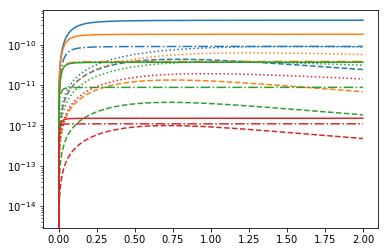

In [26]:
def gstar(z,param):
    a1=2*np.pi*c.G*param['surf_star']*c.M_sun/c.pc**2
    z0=param['H_star']*c.kpc
    g1=-a1*z/np.sqrt(z**2+z0**2)
    return g1

def ggas(z,param):
    a1=2*np.pi*c.G*param['surf_gas']*c.M_sun/c.pc**2
    z0=param['H_star']/2.*c.kpc
    g1=-a1*z/np.sqrt(z**2+z0**2)
    return g1

def gdm(z,param):
    m0=4*np.pi*rho0*R_nfw**3
    r=np.sqrt((param['radius']*c.kpc)**2+z**2)
    x=r/R_nfw
    g=-c.G*m0/r**2*(np.log(1+x)-(x)/(1+x))*(z/r)
    return g
def gdm2(z,param):
    rho0=param['rho_dm']*c.M_sun/c.pc**3
    R0=param['radius']*c.kpc
    g=-4*np.pi*c.G*rho0*z/(1+z**2/R0**2)
    return g
def gdm3(z,param):
    rho0=param['rho_dm']*c.M_sun/c.pc**3
    R0=param['radius']*c.kpc
    g=-2*np.pi*c.G*rho0*z/np.sqrt(1+z**2/R0**2)
    return g

def gbulge(z,param):
    r=np.sqrt((param['radius']*c.kpc)**2+z**2)
    g=-c.G*Mb0/(r+a)**2*(z/r)
    return g

def gz(z,param):
    return ggas(z,param)+gstar(z,param)+gdm(z,param)+gbulge(z,param)
z=np.linspace(0,2,1000)
for l,p in model.T.iteritems():
    prof=initial(p)
    r=p['radius']
    l,=plt.plot(z,-gstar(z*r*c.kpc,p))
    plt.plot(z,-gdm(z*r*c.kpc,p),color=l.get_color(),ls=':')
    plt.plot(z,-gbulge(z*r*c.kpc,p),color=l.get_color(),ls='--')
    plt.plot(z,-ggas(z*r*c.kpc,p),color=l.get_color(),ls='-.')
plt.yscale('log')

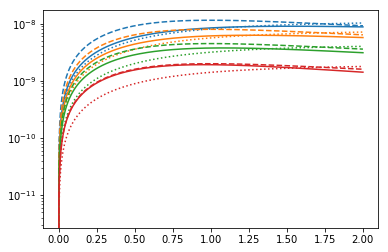

In [27]:
for l,p in model.T.iteritems():
    prof=initial(p)
    r=p['radius']
    l,=plt.plot(z,-gdm(z*r*c.kpc,p).cgs)
    plt.plot(z,-gdm2(z*r*c.kpc,p).cgs,color=l.get_color(),ls='--')
    plt.plot(z,-gdm3(z*r*c.kpc,p).cgs,color=l.get_color(),ls=':')

plt.yscale('log')

In [28]:
from galpy.potential import MWPotential,evaluatePotentials,evaluatezforces,MWPotential2014
from galpy.util import bovy_conversion
evaluatezforces(MWPotential,0.25,1)*bovy_conversion.force_in_kmsMyr(220.,8.)

-4.6822316304373599

10.0 km / s 81.0128365389 1 / cm3 23.6005557407 pc 0.25
/tigress/changgoo/miniconda2/lib/python2.7/site-packages/astropy/units/format/generic.py:462: UnitsWarning: 'km/s/Myr' contains multiple slashes, which is discouraged by the FITS standard
  core.UnitsWarning)

10.0 km / s 17.3624040833 1 / cm3 46.6891451656 pc 0.5
10.0 km / s 1.32778798715 1 / cm3 138.848160395 pc 1.0
10.0 km / s 0.0282993645631 1 / cm3 812.332747031 pc 2.0


(0, 0.5)

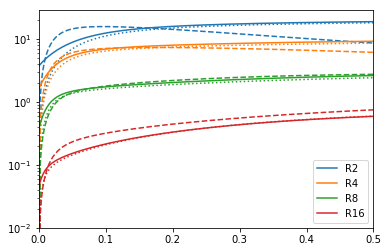

In [29]:
for l,p in model.T.iteritems():
    prof=initial(p)
    z=np.linspace(0,2,1000)
    r=p['radius']
    prof.set_n0(z*r*u.kpc)
    print prof.sig1,prof.n0,prof.H,r/8.
    l,=plt.plot(z,-prof.gext(z*r*u.kpc).to('km/s/Myr')-prof.gsg(z*r*u.kpc,prof.H).to('km/s/Myr'),label=l)
    plt.plot(z,-gz(z*r*u.kpc,p).to('km/s/Myr'),color=l.get_color(),ls=':')
    fz=[]
    for zz in z:
        fz.append(-evaluatezforces(MWPotential2014,r/8.,zz)*bovy_conversion.force_in_kmsMyr(220.,8.))
    plt.plot(z,fz,color=l.get_color(),ls='--')
plt.legend()
plt.yscale('log')
plt.xlim(0,0.5)

22.5628636306 pc 245.0 pc 84.7387102872 1 / cm3 0.931961522658
44.6248183591 pc 245.0 pc 18.1655821688 1 / cm3 2.0128631391
134.783134457 pc 245.0 pc 1.36783374383 1 / cm3 7.33537381218
804.253825347 pc 245.0 pc 0.0285836384363 1 / cm3 50.7434688292


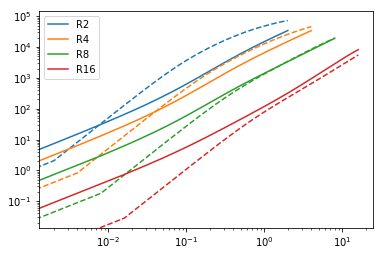

In [30]:
for l,p in model.T.iteritems():
    prof=initial(p)
    z=np.linspace(0,1,1000)
    r=p['radius']
    prof.set_n0(z*r*u.kpc)
    print prof.H,prof.z0.to('pc'),prof.n0,8/np.sqrt(prof.n0/1.15).value
    l,=plt.plot(z*r,prof.phiext(z*r*u.kpc).to('km^2/s^2')+prof.phisg(z*r*u.kpc,prof.H).to('km^2/s^2'),label=l)
    Phi=evaluatePotentials(MWPotential2014,r/8.,z)*220.**2
    plt.plot(z*r,Phi-Phi[0],color=l.get_color(),ls='--')
plt.legend()
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,1)

# Initial profiles

* Double exponentials
$$\rho(z)=\rho_1\exp(-z/H_1)+\rho_2\exp(-z/H_2)$$
$$\Sigma = 2\rho_1H_1+2\rho_2H_2$$
    * Let $\Sigma_2=0.01\Sigma_1$, $\sigma_1=7 \textrm{km/s}$, and $T_2=100T_1$. 
    * $H_1/H_2=\sigma_1/\sigma_2=(T_1/T_2)^{1/2}=0.1$, $\rho_2=0.01\rho_1 H_1/H_2=0.001\rho_1$
* Directly from potentials
$$\rho(z)=\rho\exp[-(\Phi(z)-\Phi_0)/c_s^2]$$
    * For two-components,
    $$\rho(z)\approx\rho_1\exp[-(\Phi(z)-\Phi_0)/\sigma_1^2]+\rho_2\exp[-(\Phi(z)-\Phi_0)/\sigma_2^2]$$
    * $$\Sigma=2\int_0^\infty\rho(z)dz=2(\rho_1H_1+\rho_2H_2),$$
    where
    $$H\equiv\int_0^\infty\exp(-\Phi(z)/\sigma^2)dz$$.
    * $$\frac{\Phi}{\sigma^2}=\frac{2\pi G \Sigma_* z_*}{\sigma^2}[\sqrt{1+(z/z_*)^2}-1]+\frac{2\pi G\rho_{\rm dm}R_0^2}{\sigma^2}\ln[1+(z^2/R_0^2)]\equiv \phi_1f(z)+\phi_2g(z)$$

Bmag,0 22.8178510858 P(1/2) / s(1/2)
Bmag,0 10.5657677306 P(1/2) / s(1/2)
Bmag,0 2.88781908555 P(1/2) / s(1/2)
Bmag,0 0.415355694824 P(1/2) / s(1/2)


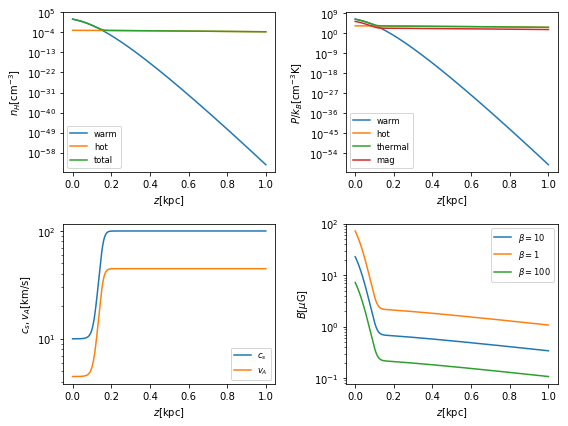

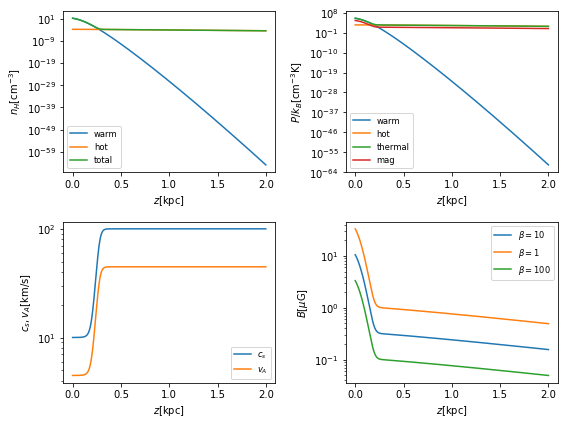

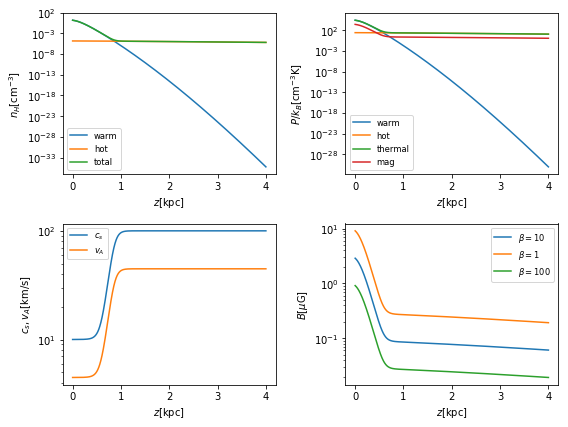

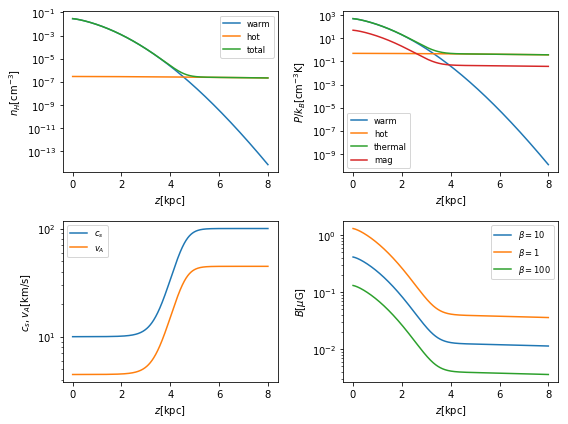

In [31]:
for l,p in model.T.iteritems():
    r=p['radius']
    z=np.linspace(0,0.5,1000)
    draw_figure(p,z*r*u.kpc)


In [32]:
model

,H_star,Omega,radius,rho_bulge,rho_dm,rho_star,surf_bulge,surf_fuv0,surf_gas,surf_star,torb,tver
R2,0.245,92.630918,2,0.013585,0.065538,0.944851,48.014618,61.107787,103.707433,462.976875,66.323965,13.143356
R4,0.245,54.800325,4,0.001226,0.022756,0.424548,8.207100,25.950125,43.970317,208.028482,112.109731,19.753741
R8,0.245,27.597684,8,0.000094,0.006400,0.085715,1.218367,6.844226,10.000062,42.000323,222.614685,43.529680
R16,0.245,11.852787,16,0.000007,0.001422,0.003494,0.166717,2.234222,1.246937,1.712021,518.329526,188.424896


In [33]:
def parse_par(rstfile):

    fp=open(rstfile,'rb')
    par={}
    fields={}
    blocks=[]
    line=fp.readline()

    while 1:

        if line.startswith('<'):
            block=line[1:line.rfind('>')]
            if block == 'par_end': break
            par[block]={}
            fields[block]=[]
            blocks.append(block)
        line=fp.readline()
        sp=line.split('=')
        if len(sp) >= 2:
            
            field=sp[0].strip()
            sp2="=".join(sp[1:]).split('#')
            value=sp2[0].strip()
            if len(sp2) == 2:
                comment=sp2[1].strip()
            else:
                comment=''
            par[block][field]=[value,comment]
            fields[block].append(field)


    par[block]=fp.tell()

    fp.close()

    return par,blocks,fields


In [35]:
import pyathena as pa

In [41]:
par0,blocks,fields=pa.parse_par('../athinput/MHD_4pc_new.params')
def get_new_params(midx):
    par_new=model.iloc[midx,:]
    Omega=par_new['Omega']/1.e3
    torb=2*np.pi/Omega
    tlim=3*torb
    tdrive=0.5*torb
    tver=par_new['tver']
    if torb/200. < 1.: tscale=1.0/round(200./torb)
    else: tscale = round(torb/200.)
    print torb,tscale
    xscale=par_new['radius']/8
    prof=initial(par_new)
    z=np.linspace(0,2,1000)
    r=p['radius']
    prof.set_n0(z*r*u.kpc)
    import copy

    par=copy.deepcopy(par0)

    for i in range(eval(par['job']['maxout'][0])):
        b='output%d' % (i+1)
        par[b]['time'][0] = '0.0'
        par[b]['num'][0] = '0'
        if par[b]['out_fmt'] == 'rst':
            par[b]['dt'][0] = '%f' % (1/Omega)
        else:
            par[b]['dt'][0] = '%f' % (eval(par0[b]['dt'][0])*tscale)
    print '# of vtk files', tlim/eval(par['output2']['dt'][0])
    print '# of rst files', tlim/eval(par['output4']['dt'][0])

    par['time']['time'][0] = '0.0'
    par['time']['nstep'][0] = '0'
    par['time']['tlim'][0] = '%f' % tlim
    for f in fields['domain1']:
        if f.startswith('x'):
            par['domain1'][f][0] = '%d' % (eval(par0['domain1'][f][0])*xscale)

    par['problem']['surf'][0] = '%g' % prof.surf_g.to('Msun/pc^2').value
    par['problem']['sz0'][0] = '%g' % prof.sig1.value
    par['problem']['n0'][0] = '%g' % prof.n0.value
    par['problem']['Omega'][0] = '%g' % Omega
    par['problem']['SurfS'][0] = '%g' % par_new['surf_star']
    par['problem']['zstar'][0] = '%g' % par_new['H_star']
    par['problem']['rhodm'][0] = '%g' % (par_new['rho_dm']+par_new['rho_bulge'])
    par['problem']['R0'][0] = '%g' % (par_new['radius']*1.e3)
    par['problem']['driving_time'][0] = '%g' % (tdrive)
    par['problem']['dtdrive'][0] = '%g' % (tdrive*0.1)
    par['problem']['dedt'][0] = '%g' % (0.01/xscale**2)
    par['feedback']['SFUV0'][0] = '%g' % par_new['surf_fuv0']
    
    return par

In [42]:
for i in range(len(model)):
    par=get_new_params(i)
    model_name=model.index[i]
    par['job']['problem_id'][0] = model_name
    print model_name
    fp=open('../athinput/athinput.%s' % model_name,'w')

    for b in blocks[:-1]:
        fp.write('<%s>\n' % b)
        if b=='output5':
            par[b]['dt'] = par['output2']['dt']

        for f in fields[b]:
            fp.write('%-15s = %-15s # %s\n' % (f,par[b][f][0],par[b][f][1]))
        fp.write('\n')

    fp.close()

67.8303254801 0.333333333333
# of vtk files 610.473539795
# of rst files 17.0932418842
R2
114.655985597 0.5
# of vtk files 687.93591358
# of rst files 19.2622054261
R4
227.670746637 1.0
# of vtk files 683.012239911
# of rst files 19.1243425645
R8
530.101911561 3.0
# of vtk files 530.101911561
# of rst files 14.8428535435
R16
